In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [2]:
from bs4 import BeautifulSoup
import requests
import json 

# Get the HTML content of the webpage
url = "https://industrial.omron.com.tr/tr/products/e2e-next"  # Replace with the actual URL
response = requests.get(url)
html_content = response.content


# Sitenizin ana URL'sini burada belirtin
base_url = "https://industrial.omron.com.tr/tr/products/e2e-next"

# BeautifulSoup ile HTML içeriğini analiz et
soup = BeautifulSoup(html_content, 'html.parser')

# Ürün bilgilerini çekmek için uygun seçiciler
products = []

rows = soup.find_all('tr', {'class': 'filtered hidden'})  # İlgili ürün satırlarını bul

for row in rows:
    product = {}
    # Ürün adı 
    product_link_tag = row.find('a', href=True)
    product['name'] = product_link_tag.text.strip()  # Ürün adı
        
    # Özellikler
    product['size'] = row.find('td', {'data-filter': 'Size'}).text.strip()
    product['mounting_type'] = row.find('td', {'data-filter': 'Mounting type'}).text.strip()
    product['sensing_distance'] = row.find('td', {'data-filter': 'Sensing distance'}).text.strip()
    product['output_type'] = row.find('td', {'data-filter': 'Output type'}).text.strip()
    product['operation_mode'] = row.find('td', {'data-filter': 'Operation mode'}).text.strip()
    product['connection_method'] = row.find('td', {'data-filter': 'Connection method'}).text.strip()
    product['material_housing'] = row.find('td', {'data-filter': 'Material housing'}).text.strip()
    product['io_link_baud_rate'] = row.find('td', {'data-filter': 'IO-Link baud rate'}).text.strip()
    product['overall_length'] = row.find('td', {'data-filter': 'Overall length of sensor'}).text.strip()
    product['thread_length'] = row.find('td', {'data-filter': 'Thread length'}).text.strip()
    product['degree_of_protection'] = row.find('td', {'data-filter': 'Degree of protection (IP)'}).text.strip()

     
    products.append(product)

# JSON formatında düzenli bir şekilde yazdır
print(json.dumps(products, indent=4, ensure_ascii=False))

# Veya aşğıdaki gibi print etmek istersenizde yan yana yazar
# Verileri yazdır
#for product in products:"""
    #print(product)


[
    {
        "name": "E2E-X10C1L30 5M",
        "size": "M30",
        "mounting_type": "Flush",
        "sensing_distance": "10 mm",
        "output_type": "NPN",
        "operation_mode": "NO",
        "connection_method": "Cable",
        "material_housing": "Brass, nickel plated",
        "io_link_baud_rate": "Not Applicable",
        "overall_length": "82.3 mm",
        "thread_length": "65 mm",
        "degree_of_protection": "IP67/IP67G/IP69K"
    },
    {
        "name": "E2E-X10C1L30-M1",
        "size": "M30",
        "mounting_type": "Flush",
        "sensing_distance": "10 mm",
        "output_type": "NPN",
        "operation_mode": "NO",
        "connection_method": "Connector M12",
        "material_housing": "Brass, nickel plated",
        "io_link_baud_rate": "Not Applicable",
        "overall_length": "80 mm",
        "thread_length": "65 mm",
        "degree_of_protection": "IP67/IP69K"
    },
    {
        "name": "E2E-X10C230 2M",
        "size": "M30",
        "

In [19]:
import csv

# ... (Your existing code for data extraction) ...

# CSV dosyası oluştur.
with open('proximity sensor.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['name','size', 'mounting_type', 'sensing_distance', 'output_type', 
                  'operation_mode', 'connection_method', 'material_housing', 'io_link_baud_rate', 
                  'overall_length', 'thread_length', 'degree_of_protection']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for product in products:
        writer.writerow(product)

print("Data exported to proximity sensor")

Data exported to proximity sensor


In [9]:
import numpy as np
import pandas as pd 
labels = ['M30', 'M8', 'M12', 'M18']
pd.read_csv("proximity sensor.csv")['size'] = np.random.choice(labels, size=1006, p=[0.3, 0.3, 0.3 , 0.1])

pd.read_csv("proximity sensor.csv")

,name,size,mounting_type,sensing_distance,output_type,operation_mode,connection_method,material_housing,io_link_baud_rate,overall_length,thread_length,degree_of_protection
0,E2E-X10C1L30 5M,M30,Flush,10 mm,NPN,NO,Cable,"Brass, nickel plated",Not Applicable,82.3 mm,65 mm,IP67/IP67G/IP69K
1,E2E-X10C1L30-M1,M30,Flush,10 mm,NPN,NO,Connector M12,"Brass, nickel plated",Not Applicable,80 mm,65 mm,IP67/IP69K
2,E2E-X10C230 2M,M30,Flush,10 mm,NPN,NC,Cable,"Brass, nickel plated",Not Applicable,60.3 mm,39 mm,IP67/IP67G/IP69K
3,E2E-X10C230 5M,M30,Flush,10 mm,NPN,NC,Cable,"Brass, nickel plated",Not Applicable,60.3 mm,39 mm,IP67/IP67G/IP69K
4,E2E-X10C230-M1,M30,Flush,10 mm,NPN,NC,Connector M12,"Brass, nickel plated",Not Applicable,58 mm,39 mm,IP67/IP69K
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,E2E-X9C1L12 2M,M12,Quasi-flush,9 mm,NPN,NO,Cable,"Brass, nickel plated",Not Applicable,69.1 mm,54 mm,IP67/IP67G/IP69K
1002,E2E-X9C1L12-M1,M12,Quasi-flush,9 mm,NPN,NO,Connector M12,"Brass, nickel plated",Not Applicable,70 mm,54 mm,IP67/IP69K
1003,E2E-X9C212-M1,M12,Quasi-flush,9 mm,NPN,NC,Connector M12,"Brass, nickel plated",Not Applicable,48 mm,28 mm,IP67/IP69K
1004,E2E-X9C2L12 2M,M12,Flush,9 mm,NPN,NC,Cable,"Brass, nickel plated",Not Applicable,69.1 mm,54 mm,IP67/IP67G/IP69K


In [10]:
df = pd.DataFrame(pd.read_csv("proximity sensor.csv"))


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [50]:
# Veri ön işleme: Kategorik değişkenleri ve özellikleri hazırlama
df['sensing_distance'] = LabelEncoder().fit_transform(df['sensing_distance'])  # sensing_distance column encoding
df['mounting_type'] = LabelEncoder().fit_transform(df['mounting_type'])  # mounting_type column encoding
df['output_type'] = LabelEncoder().fit_transform(df['output_type'])  # output_type column encoding
df['operation_mode'] = LabelEncoder().fit_transform(df['operation_mode'])  # operation_mode column encoding
df['connection_method'] = LabelEncoder().fit_transform(df['connection_method'])  # connection_method column encoding
df['material_housing'] = LabelEncoder().fit_transform(df['material_housing'])  # material_housing column encoding
df['io_link_baud_rate'] = LabelEncoder().fit_transform(df['io_link_baud_rate'])  # io_link_baud_rate column encoding
df['overall_length'] = LabelEncoder().fit_transform(df['overall_length'])  # verall_length column encoding
df['thread_length'] = LabelEncoder().fit_transform(df['thread_length'])  # thread_length column encoding
df['degree_of_protection'] = LabelEncoder().fit_transform(df['degree_of_protection'])  # degree_of_protection column encoding
df

,name,size,mounting_type,sensing_distance,output_type,operation_mode,connection_method,material_housing,io_link_baud_rate,overall_length,thread_length,degree_of_protection
0,E2E-X10C1L30 5M,2,0,1,2,1,0,0,2,19,26,0
1,E2E-X10C1L30-M1,2,0,1,2,1,1,0,2,18,26,1
2,E2E-X10C230 2M,2,0,1,2,0,0,0,2,13,16,0
3,E2E-X10C230 5M,2,0,1,2,0,0,0,2,13,16,0
4,E2E-X10C230-M1,2,0,1,2,0,1,0,2,12,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,E2E-X9C1L12 2M,0,2,22,2,1,0,0,2,14,21,0
1002,E2E-X9C1L12-M1,0,2,22,2,1,1,0,2,15,21,1
1003,E2E-X9C212-M1,0,2,22,2,0,1,0,2,7,6,1
1004,E2E-X9C2L12 2M,0,0,22,2,0,0,0,2,14,21,0


In [51]:
# Özellikler ve hedef değişken
X = df[['mounting_type','sensing_distance','output_type', 'operation_mode', 'connection_method', 'material_housing']]
y = df['size']

In [38]:
# Veriyi eğitim ve test setlerine ayırma
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_df

,mounting_type,sensing_distance,output_type,operation_mode,connection_method,material_housing
576,1,16,3,0,1,0
215,1,6,2,0,0,0
604,2,15,1,1,0,0
548,2,13,2,0,0,0
290,0,0,0,0,0,2
...,...,...,...,...,...,...
106,2,3,2,1,0,0
270,0,0,2,1,0,2
860,1,19,0,0,0,2
435,0,8,2,1,0,0


In [39]:
# Veriyi standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train.shape, X_test.shape

((905, 6), (101, 6))

In [40]:
# 1. Lojistik Regresyon Modeli
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
example_size = [[2, 3, 2, 1, 0,1]]
example_size = scaler.transform(example_size)

tahmin = log_reg.predict(example_size)
# tahmin edilen size tipi 0: , 1: , 2: , 3: 
tahmin

c:\Users\Şehide\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3])

In [45]:
X_test_df

,mounting_type,sensing_distance,output_type,operation_mode,connection_method,material_housing
927,1,21,1,1,0,0
630,2,15,3,0,1,0
682,1,15,1,1,0,2
514,1,14,2,1,1,0
365,2,11,2,0,1,0
...,...,...,...,...,...,...
184,1,6,1,1,0,0
332,1,10,0,1,0,0
88,2,3,1,1,0,0
63,1,1,0,0,0,0


In [46]:
y_test.to_list()

[0,
 0,
 3,
 1,
 2,
 0,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 0,
 3,
 3,
 2,
 1,
 0,
 3,
 1,
 2,
 2,
 3,
 2,
 3,
 3,
 0,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 0,
 3,
 1,
 3,
 2,
 3,
 2,
 1,
 3,
 0,
 0,
 3,
 0,
 3,
 3,
 0,
 2,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 3,
 0,
 1,
 3,
 0,
 2,
 0,
 3,
 1,
 1,
 0,
 3,
 2,
 3,
 0,
 0,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 3]

In [47]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 3, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 3, 1, 0, 3, 3, 3, 2, 0, 0,
       1, 1, 0, 3, 0, 3, 3, 0, 3, 0, 2, 1, 0, 2, 0, 1, 3, 2, 1, 2, 1, 3,
       2, 3, 2, 0, 3, 0, 0, 3, 1, 0, 2, 0, 2, 1, 1, 1, 0, 3, 1, 3, 3, 1,
       3, 1, 0, 0, 2, 1, 3, 1, 0, 0, 3, 0, 1, 2, 0, 2, 1, 3, 2, 0, 0, 3,
       2, 0, 0, 0, 3, 3, 0, 2, 1, 1, 2, 1, 3])

In [48]:
# 2. Karar Ağacı Modeli
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

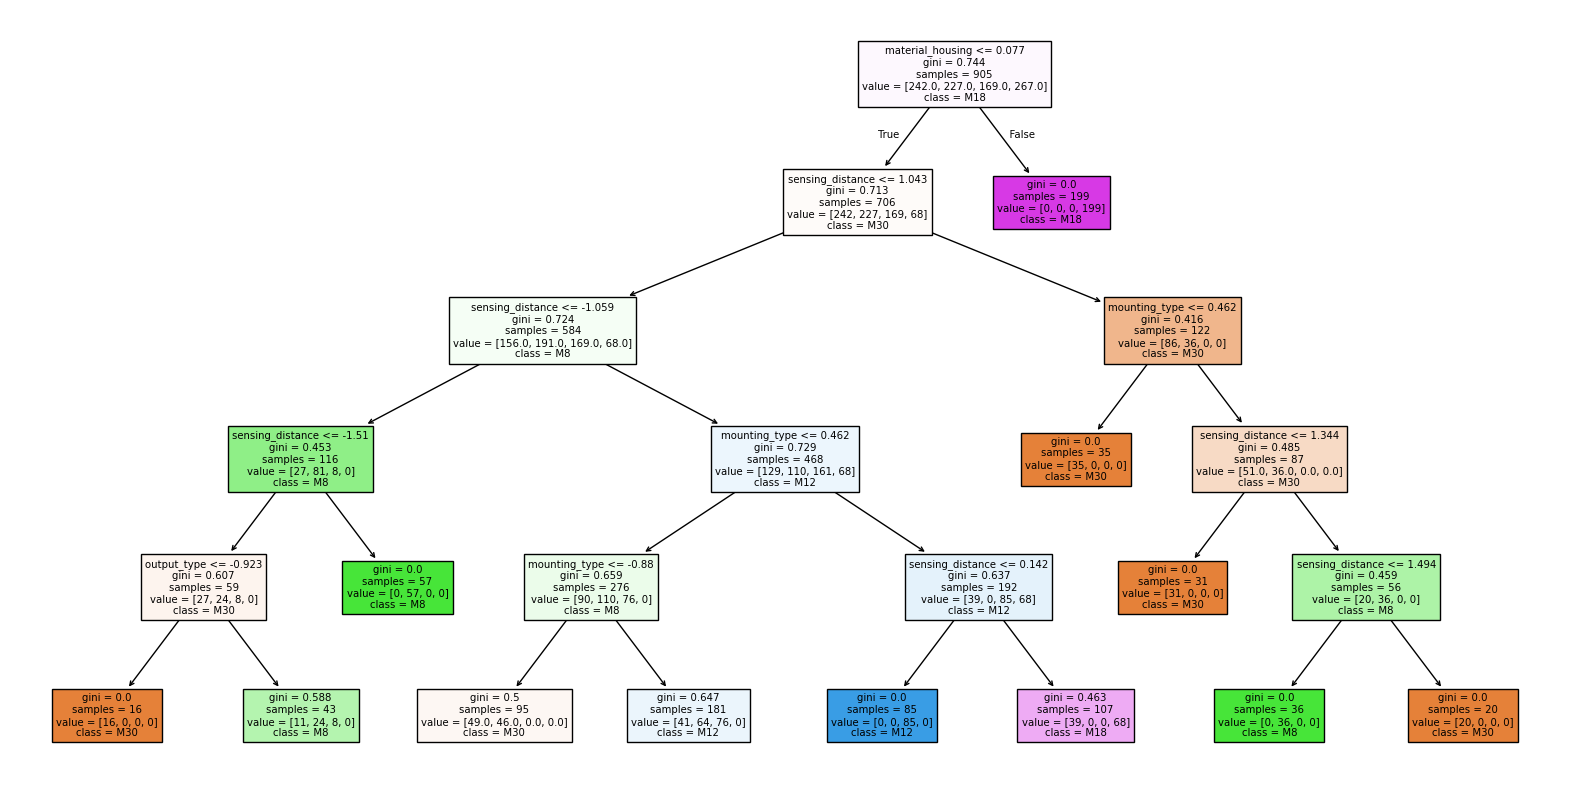

In [49]:
# Draw the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=labels)
plt.show()

In [52]:
y_pred_tree = tree_clf.predict(X_test)
y_pred_tree

array([0, 3, 3, 2, 2, 3, 3, 3, 2, 1, 1, 2, 0, 3, 2, 3, 3, 3, 2, 1, 0, 3,
       2, 2, 2, 3, 0, 3, 3, 0, 3, 2, 1, 2, 0, 1, 1, 2, 3, 2, 0, 3, 2, 3,
       2, 3, 2, 1, 3, 0, 3, 3, 0, 3, 3, 2, 2, 0, 1, 1, 0, 3, 1, 0, 0, 0,
       3, 2, 2, 0, 1, 2, 3, 2, 2, 2, 3, 0, 1, 3, 0, 2, 0, 3, 1, 1, 0, 3,
       2, 3, 3, 0, 3, 3, 0, 2, 2, 2, 1, 0, 3])

In [53]:
y_test.to_list()

[0,
 0,
 3,
 1,
 2,
 0,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 0,
 3,
 3,
 2,
 1,
 0,
 3,
 1,
 2,
 2,
 3,
 2,
 3,
 3,
 0,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 0,
 3,
 1,
 3,
 2,
 3,
 2,
 1,
 3,
 0,
 0,
 3,
 0,
 3,
 3,
 0,
 2,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 3,
 0,
 1,
 3,
 0,
 2,
 0,
 3,
 1,
 1,
 0,
 3,
 2,
 3,
 0,
 0,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 3]

In [54]:
# Performans değerlendirme
log_reg_report = classification_report(y_test, y_pred_log_reg)
tree_report = classification_report(y_test, y_pred_tree)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

(log_reg_report, log_reg_accuracy, tree_report, tree_accuracy)

('              precision    recall  f1-score   support\n\n           0       0.44      0.62      0.52        26\n           1       0.50      0.38      0.43        29\n           2       0.50      0.56      0.53        16\n           3       0.88      0.73      0.80        30\n\n    accuracy                           0.57       101\n   macro avg       0.58      0.57      0.57       101\nweighted avg       0.60      0.57      0.58       101\n',
 0.5742574257425742,
 '              precision    recall  f1-score   support\n\n           0       0.77      0.65      0.71        26\n           1       0.87      0.45      0.59        29\n           2       0.52      0.94      0.67        16\n           3       0.86      1.00      0.92        30\n\n    accuracy                           0.74       101\n   macro avg       0.75      0.76      0.72       101\nweighted avg       0.78      0.74      0.73       101\n',
 0.7425742574257426)

In [55]:
# show the results
print('Logistic Regression Model:')
print(log_reg_report)
print('Accuracy:', log_reg_accuracy)
print('Decision Tree Model:')
print(tree_report)
print('Accuracy:', tree_accuracy)

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.44      0.62      0.52        26
           1       0.50      0.38      0.43        29
           2       0.50      0.56      0.53        16
           3       0.88      0.73      0.80        30

    accuracy                           0.57       101
   macro avg       0.58      0.57      0.57       101
weighted avg       0.60      0.57      0.58       101

Accuracy: 0.5742574257425742
Decision Tree Model:
              precision    recall  f1-score   support

           0       0.77      0.65      0.71        26
           1       0.87      0.45      0.59        29
           2       0.52      0.94      0.67        16
           3       0.86      1.00      0.92        30

    accuracy                           0.74       101
   macro avg       0.75      0.76      0.72       101
weighted avg       0.78      0.74      0.73       101

Accuracy: 0.7425742574257426


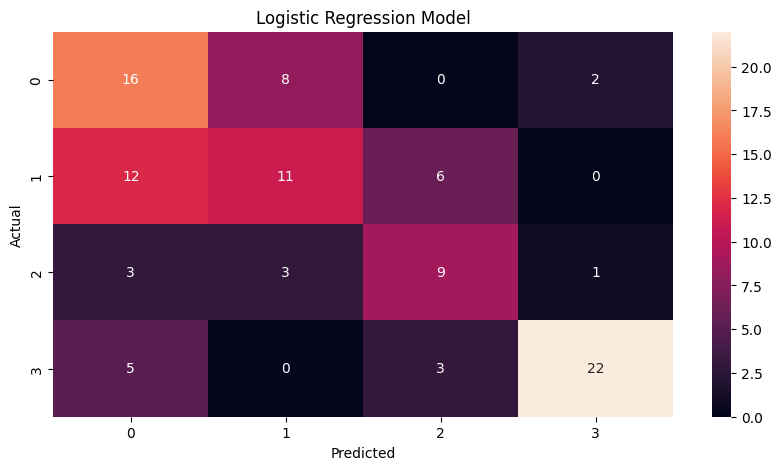

In [61]:
# draw the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_log_reg, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Logistic Regression Model')
plt.show()

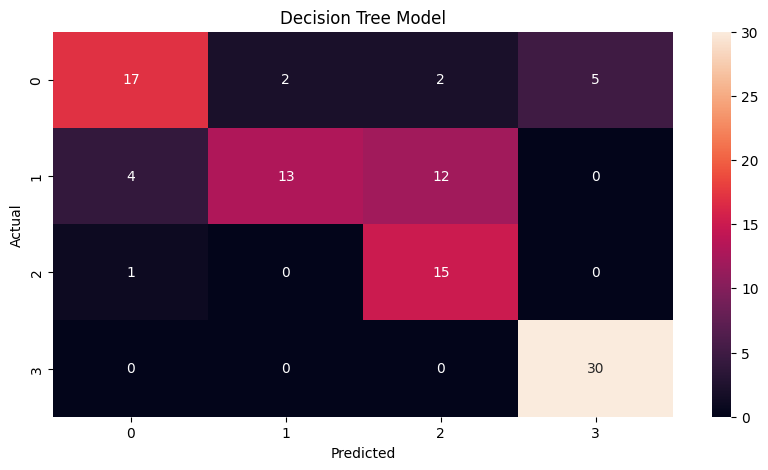

In [57]:
# draw the results
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_tree, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Decision Tree Model')
plt.show()